# 6.4 Machine Learning - Regression Analysis

## The script below contains the following:
## 1. Import libraries and data
## 2. Data cleaning
## 3. Data preparation for regression analysis
## 4. Regression analysis

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Creating the path variable

path = os.getcwd()[0:os.getcwd().find('03 Scripts')]

In [4]:
# Importing district dataframe

dist = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'district_clean.pkl'))

## 2. Data cleaning

In [5]:
# Creating a subset of the dataset

df = dist[(dist['year'] >= 2000) & (dist['enroll'] != 0)] #subsetting the dataset to see the trend for last 16 years and where enrollment count is not 0.

In [6]:
# Check the dimension of the new dataframe

df.shape

(235374, 13)

In [7]:
# Checking for null values

df.isnull().sum()

state               0
enroll              0
school_dist_name    0
year                0
total_rev           0
fed_rev             0
st_rev              0
loc_rev             0
total_exp           0
instruction_exp     0
service_exp         0
other_exp           0
capital_exp         0
dtype: int64

#### There are no null values

In [8]:
# Checking for duplicate values

df_dups = df.duplicated()

In [9]:
df_dups.shape

(235374,)

#### There are no duplicate values

In [10]:
df.describe()

,enroll,year,total_rev,fed_rev,st_rev,loc_rev,total_exp,instruction_exp,service_exp,other_exp,capital_exp
count,2.353740e+05,235374.000000,2.353740e+05,2.353740e+05,2.353740e+05,2.353740e+05,2.353740e+05,2.353740e+05,2.353740e+05,235374.000000,2.353740e+05
mean,3.465450e+03,2007.884252,3.869911e+04,3.354919e+03,1.806242e+04,1.728177e+04,3.919452e+04,2.036764e+04,1.131966e+04,1742.031027,3.909082e+03
std,1.474104e+04,4.906704,2.137915e+05,2.273507e+04,9.862154e+04,1.019912e+05,2.276024e+05,1.406475e+05,5.096206e+04,8720.301555,2.597712e+04
min,1.000000e+00,2000.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.890000e+02,2004.000000,4.371000e+03,2.530000e+02,1.976000e+03,1.419000e+03,4.302000e+03,2.204000e+03,1.272000e+03,174.000000,1.240000e+02
50%,1.105000e+03,2008.000000,1.207200e+04,7.300000e+02,5.767000e+03,4.329000e+03,1.200500e+04,6.162000e+03,3.519000e+03,480.000000,4.770000e+02
75%,2.889000e+03,2012.000000,3.194075e+04,2.141000e+03,1.431100e+04,1.359500e+04,3.206200e+04,1.651100e+04,9.419000e+03,1322.000000,2.000000e+03
max,1.077381e+06,2016.000000,2.744836e+07,3.120314e+06,1.056801e+07,1.514124e+07,2.962010e+07,2.076645e+07,4.786795e+06,707408.000000,3.151607e+06


### Creating data visually for the variables whose relationship will be tested

In [11]:
sns.set_style({'axes.facecolor': 'black', 'figure.facecolor':'black','text.color':'white', 'xtick.color': 'white', 'ytick.color':'white', 'axes.edgecolor': 'white','xlabel.color':'white','ylabel.color':'white'})

C:\Users\babum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


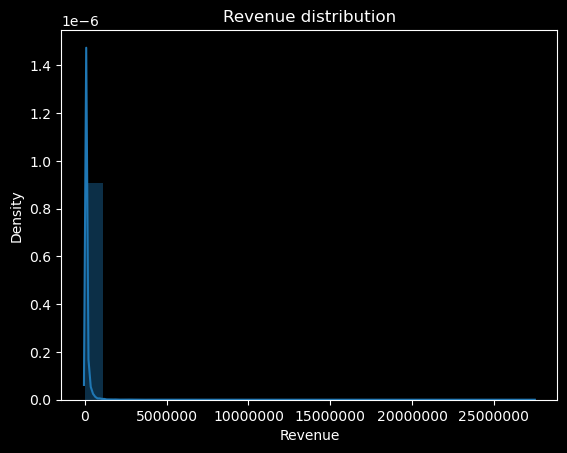

In [12]:
# Creating distribution plot to check for extreme values in total revenue

sns.distplot(df['total_rev'], bins = 25);
plt.title('Revenue distribution');  
plt.xlabel('Revenue', color = 'white');  
plt.ylabel('Density', color = 'white'); 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show();

C:\Users\babum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


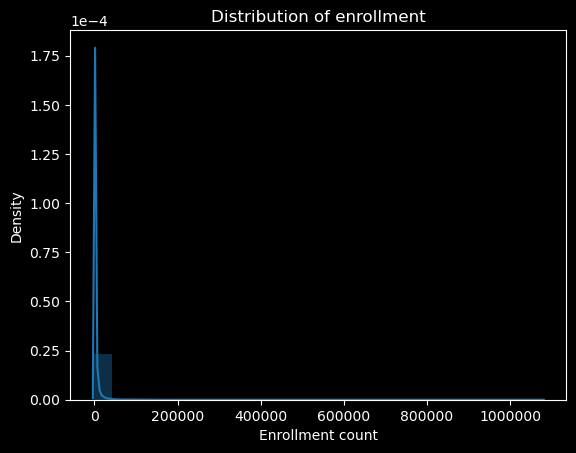

In [13]:
# Creating distribution plot to check for extreme values in enrollment

sns.distplot(df['enroll'], bins = 25);
plt.title('Distribution of enrollment');  
plt.xlabel('Enrollment count', color = 'white');  
plt.ylabel('Density', color = 'white'); 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show();

C:\Users\babum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


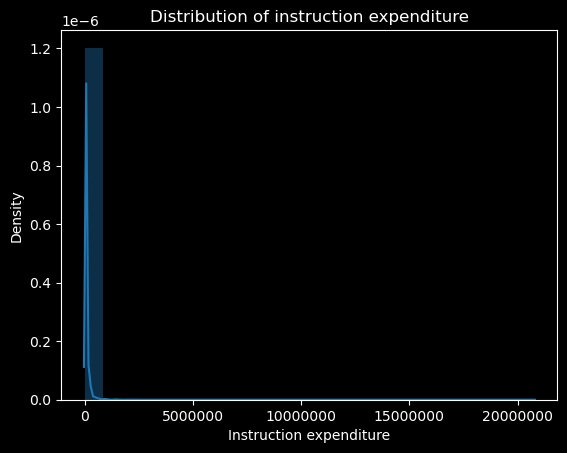

In [14]:
# Creating the distibution plot to check for extreme values in instruction expenditure

sns.distplot(df['instruction_exp'], bins = 25);
plt.title('Distribution of instruction expenditure');  
plt.xlabel('Instruction expenditure', color = 'white');  
plt.ylabel('Density', color = 'white'); 
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.show();

#### The extreme values showed in the visualization are the values for states like California, Texas, New york over the years 2000-2016. This is not considered as extreme values here and will not be removed for analysis further.

## Hypothesis 1 - If there is a increase in enrollment count then the total revenue increases.

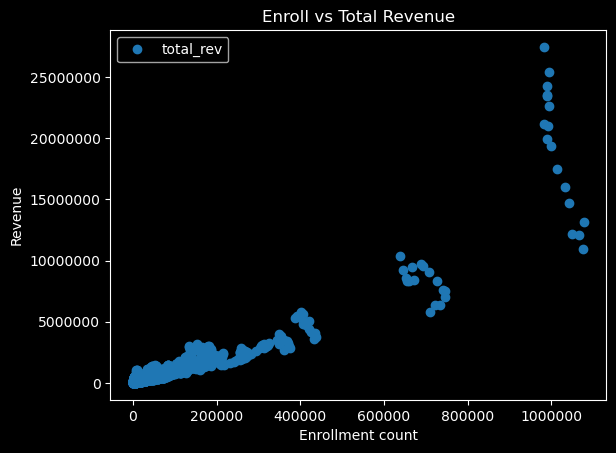

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'enroll', y='total_rev',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Enroll vs Total Revenue')  
plt.xlabel('Enrollment count', color = 'white')  
plt.ylabel('Revenue', color = 'white') 
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.show()

## 3. Data preparation for regression analysis

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['enroll'].values.reshape(-1,1)
y = df['total_rev'].values.reshape(-1,1)

In [17]:
X

array([[ 9609.],
       [30931.],
       [  912.],
       ...,
       [ 1406.],
       [  869.],
       [  265.]])

In [18]:
y

array([[ 80867],
       [338236],
       [ 10116],
       ...,
       [ 12610],
       [ 19898],
       [  9320]], dtype=int64)

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

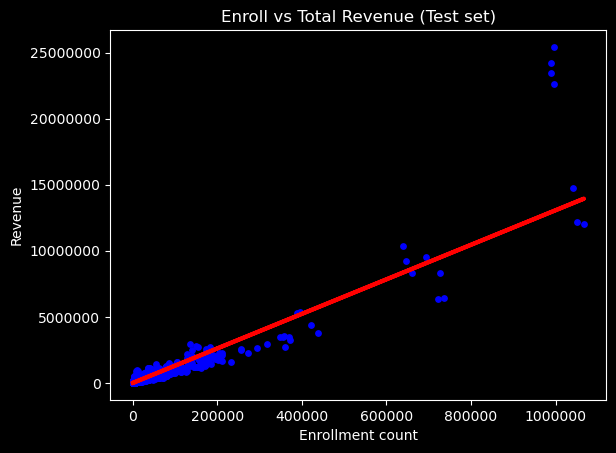

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Enroll vs Total Revenue (Test set)')
plot_test.xlabel('Enrollment count', color = 'white')
plot_test.ylabel('Revenue', color = 'white')
plot_test.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plot_test.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plot_test.show()

#### The line shows a positive trend in the data. The revenue increases as the enrollment count increases. But the regression line doesn't perfectly cover all the data points. 

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [25]:
# Print the model summary statistics to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.07750718]]
Mean squared error:  9136229353.06086
R2 score:  0.8432537891620785


#### The slope here is positive, this indicates positive relationship between the variables. This means that as enrollment count rises revenue rises at a degree of 13.08. The larger MSE here indicates that the regression line is farther away from the data points, indicating that the regression line is not an accurate representation of data. R2 value is 84% shows that this is a good fit. This has to be further checked with the predicted value.

In [26]:
y_predicted

array([[ -3844.93437653],
       [  2602.27666348],
       [ -5793.48294644],
       ...,
       [119502.1133505 ],
       [ 86625.26029857],
       [  4302.35259695]])

In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2117,-3.844934e+03
1,3830,2.602277e+03
2,1209,-5.793483e+03
3,46,-6.565056e+03
4,4926,-1.425596e+03
5,38265,2.109387e+04
6,26265,1.510437e+04
7,804,-5.597320e+03
8,39338,1.826913e+04
9,4516,-8.371077e+02


#### The variance in the predicted values shows that this model is not the perfect model of this data points.

In [28]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[13.07750718]]
Mean squared error:  5588780529.231833
R2 score:  0.8613717374594768


#### The model fits the training dataset only slightly better that the test dataset. This means that the model is not overfitted.

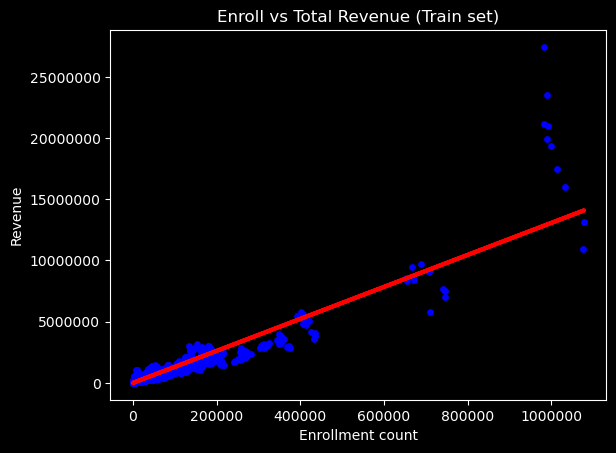

In [51]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='blue', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Enroll vs Total Revenue (Train set)')
plot_test.xlabel('Enrollment count', color = 'white')
plot_test.ylabel('Revenue', color = 'white')
plot_test.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plot_test.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plot_test.show()

## Hypothesis 2 - If there is increase in total revenue then the instruction expenditure per student increases.

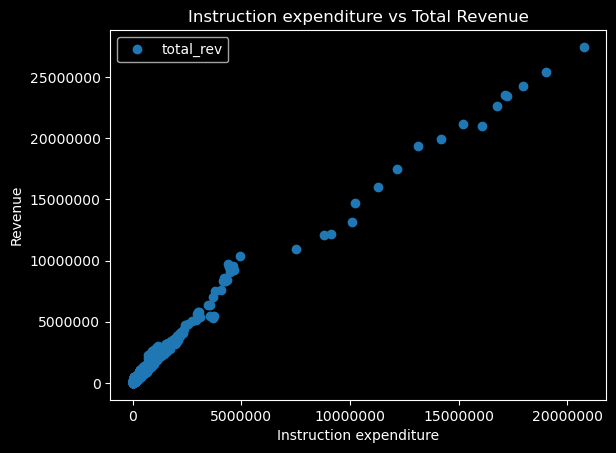

In [32]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'instruction_exp', y='total_rev',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Instruction expenditure vs Total Revenue')  
plt.xlabel('Instruction expenditure', color = 'white')  
plt.ylabel('Revenue', color = 'white') 
plt.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plt.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X1 = df['instruction_exp'].values.reshape(-1,1)
y1 = df['total_rev'].values.reshape(-1,1)

In [34]:
X1

array([[ 43843],
       [164977],
       [  4907],
       ...,
       [  7360],
       [  4830],
       [  1877]], dtype=int64)

In [35]:
y1

array([[ 80867],
       [338236],
       [ 10116],
       ...,
       [ 12610],
       [ 19898],
       [  9320]], dtype=int64)

In [36]:
# Split data into a training set and a test set.

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [37]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [38]:
# Fit the regression object onto the training set.

regression.fit(X1_train, y1_train)

LinearRegression()

In [39]:
# Predict the values of y using X.

y1_predicted = regression.predict(X1_test)

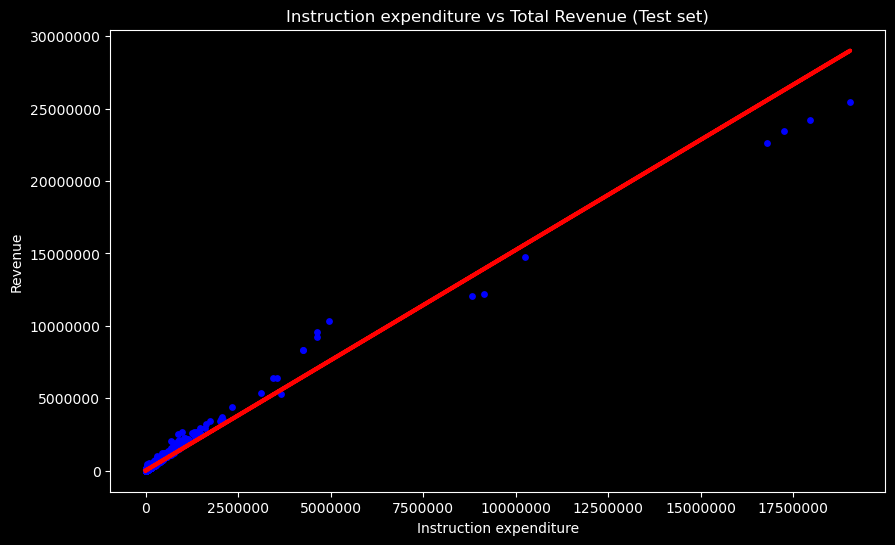

In [52]:
# Create a plot that shows the regression line from the model on the test set.
plt.figure(figsize = (10,6))
plot_test = plt
plot_test.scatter(X1_test, y1_test, color='blue', s = 15)
plot_test.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test.title('Instruction expenditure vs Total Revenue (Test set)')
plot_test.xlabel('Instruction expenditure', color = 'white')
plot_test.ylabel('Revenue', color = 'white')
plot_test.ticklabel_format(axis = 'y', style = '',scilimits = (0,10));
plot_test.ticklabel_format(axis = 'x', style = '',scilimits = (0,10));
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2 = r2_score(y1_test, y1_predicted) # This is the R2 score.

In [43]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.52242318]]
Mean squared error:  1671074546.5812645
R2 score:  0.9713301195622288


In [44]:
y1_predicted

array([[ 9531.13271547],
       [10762.77306608],
       [ 8757.74174128],
       ...,
       [67323.83895739],
       [58056.84907581],
       [13047.93025554]])

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data1.head(30)

,Actual,Predicted
0,2117,9.531133e+03
1,3830,1.076277e+04
2,1209,8.757742e+03
3,46,7.795570e+03
4,4926,1.186044e+04
5,38265,2.440216e+04
6,26265,2.844572e+04
7,804,8.180743e+03
8,39338,4.030692e+04
9,4516,1.114033e+04


In [46]:
# Predict.

y1_predicted_train = regression.predict(X1_train) # This is predicting X_train!

In [47]:
rmse = mean_squared_error(y1_train, y1_predicted_train)
r2 = r2_score(y1_train, y1_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.52242318]]
Mean squared error:  1275613554.6275682
R2 score:  0.968358734105548


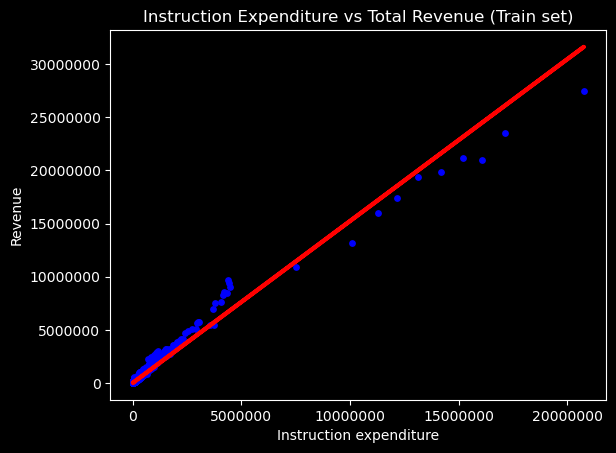

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X1_train, y1_train, color='blue', s = 15)
plot_test.plot(X1_train, y1_predicted_train, color='red', linewidth =3)
plot_test.title('Instruction Expenditure vs Total Revenue (Train set)')
plot_test.xlabel('Instruction expenditure', color = 'white')
plot_test.ylabel('Revenue', color = 'white')
plot_test.ticklabel_format(axis = 'y', style = '', scilimits = (0,10));
plot_test.ticklabel_format(axis = 'x', style = '', scilimits = (0,10));
plot_test.show()

### In both the hypothesis eventhough R2 score is near 1 the y_predicted value shows a huge variance. Single regression line is not enough to fit this model. 
### In hypothesis 1 enrollment count could be one of the reason for increase in revenue for each school but its not the only one factor influencing the increase in funding or not. 
### This variance in this data might be due to the extreme values in the dataset. But in this scenario those extreme values couldnot be avoided as these extreme values are due to the size of the state. Avoiding these values could cause bias in the data. 